In [1]:
# imports some software packages we'll use. Nothing here needs to be changed. Hit the play button!
import pandas as pd # Pandas works with python to help us wrangle data. It can sort, clean, and read our csv files. csv files are how we input data
import numpy as np # Numpy handles the math!
import matplotlib as mpl
import matplotlib.pyplot as plt # Both of these help us make pretty graphs
!pip install geopandas
import geopandas as gpd # Geopandas helps us with geospatial data. We're using data with latitudes and longitudes... So we might need a map.

In [2]:
#Create a dataframe object for your data here
#Use data from this website: https://query.data.world/s/sylnn5qhouzbjc37lh2ltteha5ubjn

# one month of seismic data from early 2019
breastcancer = pd.read_csv("https://raw.githubusercontent.com/kiorabell/APCSP/main/output.csv")

In [3]:
#display the header for the data here:
breastcancer.head(5) # choose to show the first (how many) lines of the file

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [4]:
#use the .shape command on your data to see how many rows and columns it has
breastcancer.shape

(1707, 31)

In [5]:
#use the .describe commany on your data to see what sorts of data you have
breastcancer.describe(include='all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,...,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,15.685153,21.884470,102.338293,744.269766,0.127187,0.108874,0.120859,0.070527,0.196364,0.046889,...,29.298363,120.208394,1097.084382,0.153036,0.336826,0.391843,0.154030,0.329089,0.078518,0.372583
std,4.141541,4.725375,27.870323,357.352446,0.815260,0.802414,0.809326,0.789224,0.821795,0.839971,...,6.700861,38.984300,702.241081,0.794119,0.822466,0.819804,0.805770,0.811623,0.826379,0.483634
min,6.981000,9.710000,43.790000,143.500000,-3.146299,-2.835169,-3.121895,-3.134458,-3.274858,-3.277862,...,12.020000,50.410000,185.200000,-2.928944,-2.596145,-2.742923,-2.953758,-2.948384,-3.377854,0.000000
25%,12.770000,18.605000,82.776758,512.073910,-0.138822,-0.202028,-0.147444,-0.241727,-0.068324,-0.270379,...,24.723592,92.325085,619.397551,-0.164132,0.058837,0.037684,-0.139854,0.091567,-0.239941,0.000000
50%,14.715360,21.540000,95.248300,646.270887,0.098160,0.094450,0.075564,0.038067,0.180900,0.061330,...,28.940000,107.700908,799.600000,0.134100,0.254800,0.312000,0.108488,0.288400,0.078730,0.000000
75%,18.148302,24.746887,118.559141,880.468052,0.446858,0.425137,0.450434,0.377214,0.540978,0.381090,...,33.518842,144.983648,1493.875857,0.430273,0.739822,0.821486,0.470055,0.619518,0.403826,1.000000
max,31.985974,42.378628,210.419964,2635.306447,3.951918,3.142277,3.220939,3.742178,3.598207,3.286311,...,56.203999,281.471268,4850.529508,3.242244,3.022246,3.639660,2.818785,3.633160,3.012396,1.000000


In [6]:
#Find out how many columns are of the data type float64  (#s we can use to graph)
breastcancer.select_dtypes('bool')

""
0
1
2
3
4
...
1702
1703
1704
1705


In [7]:
#Often, empty rows or rows with missing data can megatively impact the resuts you are getting.
#They can, infact,stop some of our algorithms from running. So, let's clean them up with

breastcancer.dropna(inplace = True) #except of course replace df with your own dataframe object name

#Now how many columns and rows are there?

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>],
       [<Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

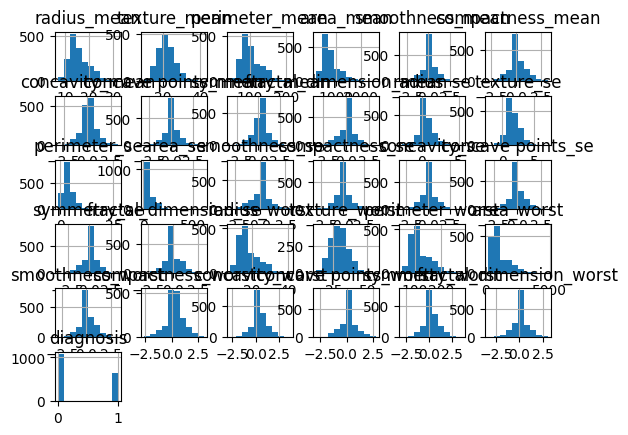

In [8]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
breastcancer.hist()

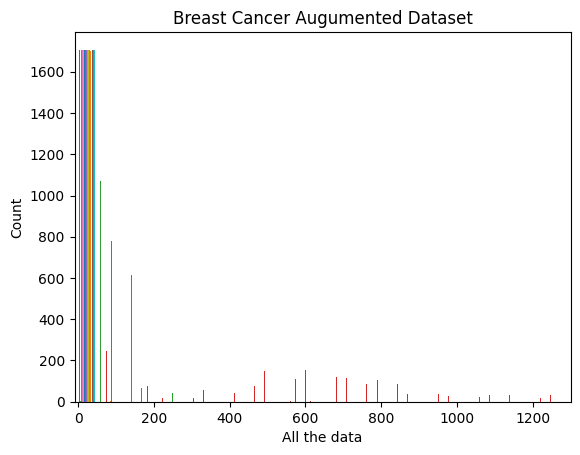

In [19]:
# The humber of bins can be adjusted. Here, we are setting bins of 20 and labeling x and y, along with titling the plot.
plt.hist(breastcancer,bins=90)
plt.ylabel('Count')
plt.xlabel('All the data')
plt.title('Breast Cancer Augumented Dataset')
plt.xlim(-10,1300)
plt.show()

<Axes: >

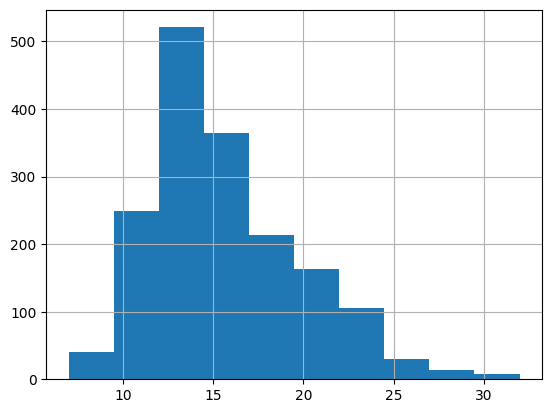

In [10]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
breastcancer.radius_mean.hist()

<Axes: >

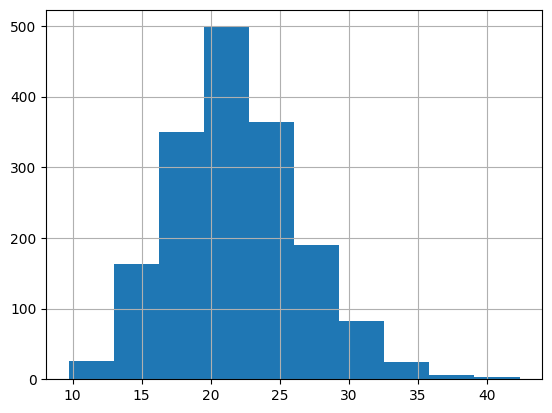

In [11]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
breastcancer.texture_mean.hist()

<Axes: >

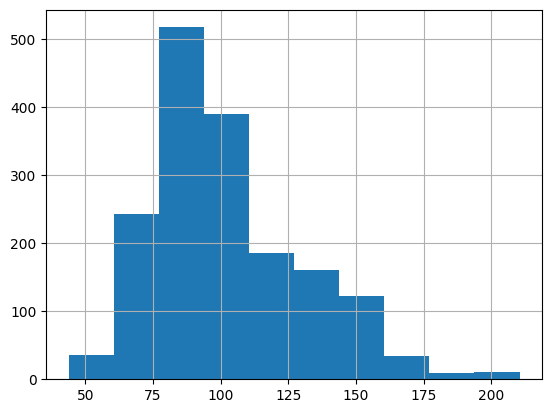

In [12]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
breastcancer.perimeter_mean.hist()

<Axes: >

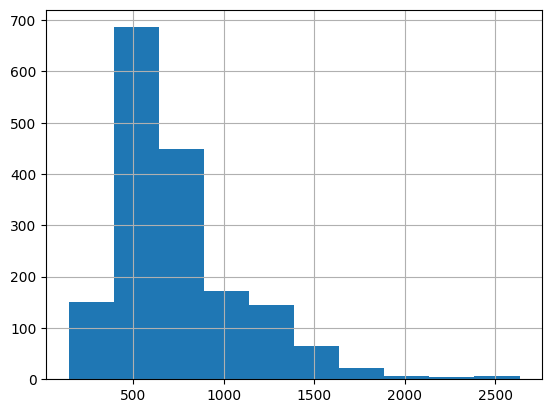

In [13]:
# The simplest histogram--plt.hist divides the range into 10 even bins for easier plotting.
# The output shows how the bin cutoffs were set. The long form of writing this would be plt.hist(adult.age); the short form works, too
breastcancer.area_mean.hist()

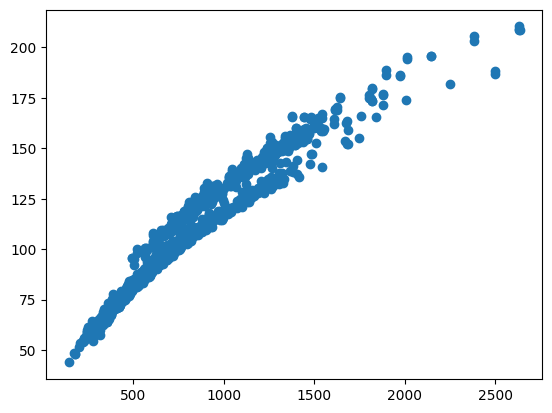

In [17]:
# And we can subdivide the categories by another, just like the hierarchical groupby you have seen above.
a = breastcancer[('area_mean')]
b = breastcancer[('perimeter_mean')]
plt.scatter(a,b)


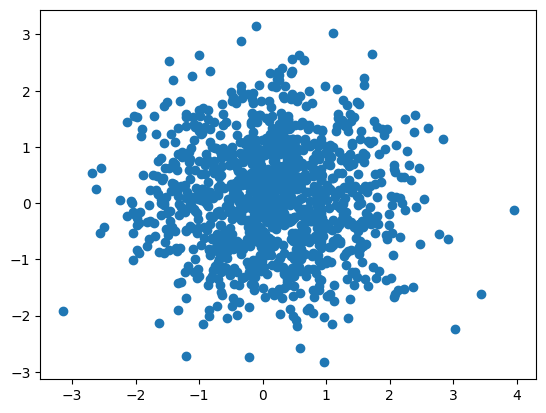

In [15]:
# And we can subdivide the categories by another, just like the hierarchical groupby you have seen above.
x = breastcancer[('smoothness_mean')]
y = breastcancer[('compactness_mean')]
plt.scatter(x,y)
#breastcancer.hist(column='smoothness_mean',by='compactness_mean')